In [1]:
import pandas as pd
from datetime import datetime, timedelta, timezone
from dateutil import tz

In [2]:
# read file/s
oldtown_sensors = pd.read_csv(r'tallin_oldtown_motionsensors_31.03.2022.csv', sep = ';', parse_dates = ['UTC timestamp'])

In [3]:
# making copy of original dataset
df = oldtown_sensors.copy(deep=True)

# getting the local timezone
et = tz.gettz('Europe/Tallinn')

# convert to UTC timezone
# df['iso_date'] = df['UTC timestamp'].apply(lambda x: x.isoformat()) 
df['UTC timestamp']  = pd.to_datetime(df['UTC timestamp'], utc=True) # make UTC

# create localised time zone column
df['eest_time'] = df['UTC timestamp'].dt.tz_convert(tz = et) # convert the timezone

# getting rid of GMT+2 to actual time
df['eest_time'] = df['eest_time'].\
dt.tz_localize(None) # get rid of the +2 kind of thing

print('dataset consists of {}. with start date of {} and end date of {} in local estonian time'.format (df.eest_time.max() - df.eest_time.min(),df.eest_time.min(),df.eest_time.max() ))

dataset consists of 336 days 23:50:00. with start date of 2022-01-01 02:00:00 and end date of 2022-12-04 01:50:00 in local estonian time


In [4]:
# sum of counts of the senors in and out 
df.groupby('Device')['count'].sum()

Device
Harju 13                     397954
Nunne Suur-Kloostri_0        509991
Nunne Suur-Kloostri_1        302272
Pikk 72 - Suur Rannavärav    567054
Suur-Karja 18_0              116039
Suur-Karja 18_1              320525
Suur-Karja 20-22_0           397312
Suur-Karja 20-22_1            68819
Suurtüki Laboratooriumi      227462
Toompea - Falgi tee_0        259260
Toompea - Falgi tee_1         93070
Uus - Väike Rannavärav       302280
Valli 4                      227527
Vana-Viru 12_0               175450
Vana-Viru 12_1               363358
Viru tänav_27_0              612824
Viru tänav_27_1              658743
Väike-Karja 12               251245
Name: count, dtype: int64

In [5]:
# count of each months sum of ppl for all the sensors
# df.set_index('eest_time', inplace=True)  
# df.groupby(pd.Grouper(freq='M'))['count'].sum()

In [6]:
# shows count of max 
df.loc[df.groupby('Device').eest_time.idxmax()]

,Device,UTC timestamp,count,in,out,eest_time
10345,Harju 13,2022-12-03 23:50:00+00:00,32,12,20,2022-12-04 01:50:00
22761,Nunne Suur-Kloostri_0,2022-12-03 23:50:00+00:00,30,3,27,2022-12-04 01:50:00
35617,Nunne Suur-Kloostri_1,2022-12-03 23:50:00+00:00,33,23,10,2022-12-04 01:50:00
48448,Pikk 72 - Suur Rannavärav,2022-12-03 23:50:00+00:00,26,16,10,2022-12-04 01:50:00
61098,Suur-Karja 18_0,2022-12-03 23:50:00+00:00,59,53,6,2022-12-04 01:50:00
73849,Suur-Karja 18_1,2022-12-03 23:50:00+00:00,49,9,40,2022-12-04 01:50:00
86278,Suur-Karja 20-22_0,2022-12-03 23:50:00+00:00,24,20,4,2022-12-04 01:50:00
98931,Suur-Karja 20-22_1,2022-12-03 23:50:00+00:00,12,5,7,2022-12-04 01:50:00
111582,Suurtüki Laboratooriumi,2022-12-03 23:50:00+00:00,14,9,5,2022-12-04 01:50:00
124347,Toompea - Falgi tee_0,2022-12-03 23:50:00+00:00,4,3,1,2022-12-04 01:50:00


In [7]:
# grouping max count for each device every month
final_data = df.groupby([df.Device, df.eest_time.dt.month])['count'].sum()

In [8]:
# make df from series to get the final sum count for each month. using similar approach can be calculated peak time for each sensor
final_data.to_frame().reset_index()

,Device,eest_time,count
0,Harju 13,1,98554
1,Harju 13,2,79871
2,Harju 13,3,88443
3,Harju 13,4,15873
4,Harju 13,5,16798
...,...,...,...
211,Väike-Karja 12,8,7587
212,Väike-Karja 12,9,7577
213,Väike-Karja 12,10,8279
214,Väike-Karja 12,11,9257


<AxesSubplot:xlabel='eest_time'>

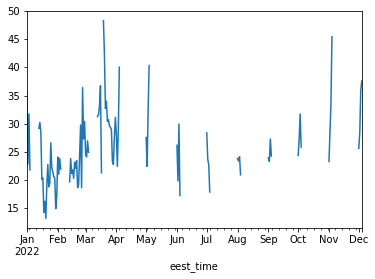

In [9]:
# mean count for each month
df.resample('D', on = 'eest_time')['count'].mean().plot()

In [ ]:
### GOES WITH ME

# backslah and new line does not break the code and good for chaining

# checking if there are any empty data cells
# df.isnull().sum()

# checking empty data cells based on single column
# df[df.col_name.isnull()]

# checking how many number of unique values in any column
# df.col_name.nunique()

# checking unique values of a specific column
# df.col_name.unique()

# using filter by single column
# df[df.col_name == 'cell_value']

# using filter by multiple columns
# df[(df.col_name == 'cell_value') & (df.col_name == 'cell_value')]
# df_filt = df[(df['ESMANE_REG_KP'] >= "2021-01-01") & (df['ESMANE_REG_KP'] < "2022-01-01")]

# Filtering on base of year or month, Make your the column type is date and giving how many rows are in that specific time frame
# df.groupby(df.col_name.dt.year).col_name.count()
# df[['col_name']].value_counts().reset_index(name='ortho_count')

# creating bin to get the bin wise count
# pd.qcut(df.ESMANE_REG_KP.dt.year, q=5, precision=0, duplicates='raise').value_counts()

# Filtering on base of year or month, Make your the column type is date
#pd.pivot_table(data = df , index = df.ESMANE_REG_KP.dt.year)